In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

### 1.基本概率论

In [2]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 1., 0., 0., 0.])

In [3]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([0., 3., 1., 1., 3., 2.])

In [4]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts

tensor([163., 165., 154., 165., 169., 184.])

In [5]:
counts / 1000  # 相对频率作为估计值

tensor([0.1630, 0.1650, 0.1540, 0.1650, 0.1690, 0.1840])

### 500组实验

In [20]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
counts

tensor([[0., 1., 3., 1., 2., 3.],
        [2., 1., 2., 2., 1., 2.],
        [0., 2., 3., 1., 2., 2.],
        ...,
        [0., 2., 3., 0., 3., 2.],
        [2., 0., 2., 3., 0., 3.],
        [2., 0., 2., 3., 2., 1.]])

In [21]:
cum_counts = counts.cumsum(dim=0)
cum_counts

tensor([[  0.,   1.,   3.,   1.,   2.,   3.],
        [  2.,   2.,   5.,   3.,   3.,   5.],
        [  2.,   4.,   8.,   4.,   5.,   7.],
        ...,
        [834., 807., 840., 835., 839., 825.],
        [836., 807., 842., 838., 839., 828.],
        [838., 807., 844., 841., 841., 829.]])

In [14]:
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

In [23]:
estimates

tensor([[0.1000, 0.3000, 0.1000, 0.1000, 0.2000, 0.2000],
        [0.2500, 0.2000, 0.1500, 0.1000, 0.1500, 0.1500],
        [0.2000, 0.2000, 0.1000, 0.1667, 0.1667, 0.1667],
        ...,
        [0.1651, 0.1769, 0.1647, 0.1635, 0.1693, 0.1606],
        [0.1649, 0.1772, 0.1645, 0.1633, 0.1693, 0.1607],
        [0.1648, 0.1768, 0.1648, 0.1630, 0.1698, 0.1608]])

In [28]:
estimates[:, 0].numpy()

array([0.1       , 0.25      , 0.2       , 0.225     , 0.22      ,
       0.21666667, 0.2       , 0.175     , 0.16666667, 0.17      ,
       0.16363636, 0.18333334, 0.16923077, 0.17142858, 0.17333333,
       0.175     , 0.1764706 , 0.18888889, 0.17894737, 0.175     ,
       0.17142858, 0.17727272, 0.18695652, 0.17916666, 0.18      ,
       0.17307693, 0.16666667, 0.16785714, 0.16551724, 0.16666667,
       0.16451614, 0.1625    , 0.16363636, 0.16176471, 0.16857143,
       0.16666667, 0.16756757, 0.16578947, 0.16410257, 0.1625    ,
       0.16585366, 0.16666667, 0.16511628, 0.16818182, 0.16888888,
       0.17173913, 0.17021276, 0.16666667, 0.16530612, 0.162     ,
       0.16470589, 0.16730769, 0.16415094, 0.16481481, 0.16545455,
       0.16607143, 0.16666667, 0.16551724, 0.1661017 , 0.16333333,
       0.16557378, 0.16451614, 0.16349207, 0.1625    , 0.16      ,
       0.16060606, 0.16119403, 0.16323529, 0.16521738, 0.16857143,
       0.16760564, 0.16666667, 0.16438356, 0.16486487, 0.16666

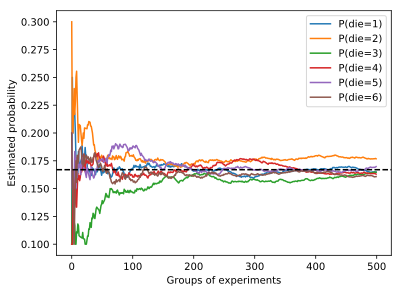

In [24]:
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();